Dataset Link :
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Loan Prediction Dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import Imputer

In [3]:
#Importing Dataset
data = pd.read_csv("C:/Users/sadha/Desktop/Python/Loan Prediction/train_u6lujuX_CVtuZ9i.csv")
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
198,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
305,LP001990,Male,No,0,Not Graduate,No,2000,0.0,NaN,360.0,1.0,Urban,N
224,LP001750,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,1.0,Semiurban,Y
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
238,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
281,LP001914,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban,Y
276,LP001903,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data['Credit_History'] = data.Credit_History.astype(object)
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#Looking at the Numerical columns
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [24]:
#Looking at the Categorical columns
cat = data.select_dtypes(exclude = ['int64', 'float64'])
cat.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002738,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [11]:
#checking for missing values
data.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Separating numeric data
num = data.select_dtypes(exclude=['object'])
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


IMPUTING MISSING VALUES

In [13]:
imp = Imputer()
imp.fit(num)
num_imp = pd.DataFrame(imp.fit_transform(num))
num_imp.columns = num.columns
num_imp.apply(lambda x: sum(x.isnull()))

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [25]:
cat = cat.drop(columns = 'Loan_ID')
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [27]:
cat['Gender'].fillna('Male', inplace = True)
cat['Married'].fillna('Yes', inplace = True)
cat['Dependents'].fillna('0', inplace = True)
cat['Self_Employed'].fillna('No', inplace = True)
cat['Credit_History'].fillna(1, inplace = True)

In [28]:
cat.apply(lambda x: sum(x.isnull()))

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [33]:
data2 = pd.concat([num_imp,cat], axis = 1)
data2.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
110,5316.0,0.0,136.0,360.0,Male,No,0,Graduate,No,1.0,Urban,Y
157,9538.0,0.0,187.0,360.0,Male,Yes,1,Graduate,No,1.0,Urban,Y
107,7333.0,0.0,120.0,360.0,Male,No,0,Not Graduate,No,1.0,Rural,N
359,5167.0,3167.0,200.0,360.0,Male,Yes,3+,Graduate,No,1.0,Semiurban,Y
517,3074.0,1800.0,123.0,360.0,Male,Yes,0,Not Graduate,No,0.0,Semiurban,N
302,5000.0,0.0,132.0,360.0,Female,No,0,Graduate,No,1.0,Rural,Y
234,3155.0,1779.0,140.0,360.0,Male,Yes,1,Graduate,No,1.0,Semiurban,Y
315,3399.0,1640.0,111.0,180.0,Male,Yes,1,Not Graduate,No,1.0,Urban,Y
331,2935.0,0.0,98.0,360.0,Male,No,0,Graduate,No,1.0,Semiurban,Y
530,1025.0,5500.0,216.0,360.0,Male,Yes,0,Graduate,No,1.0,Rural,Y


TREATING EXTREMETIES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B93ED0D2B0>,
      dtype=object)

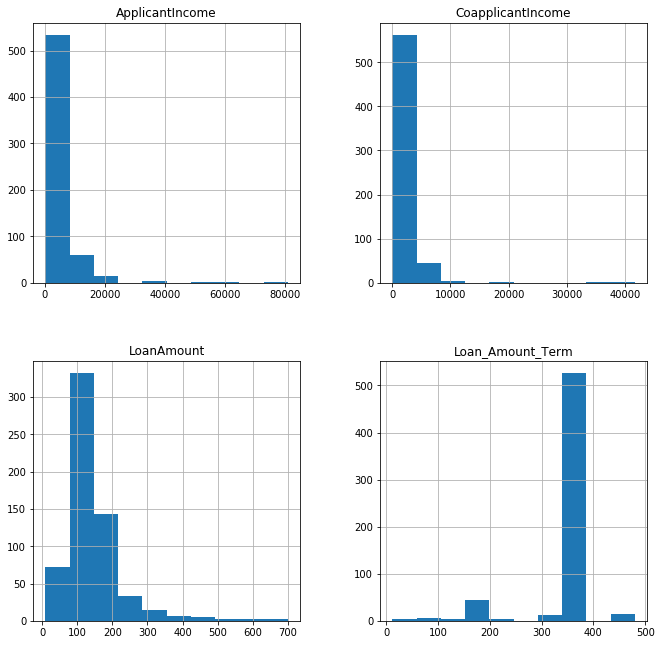

In [39]:
num_imp.hist(figsize = [11,11])

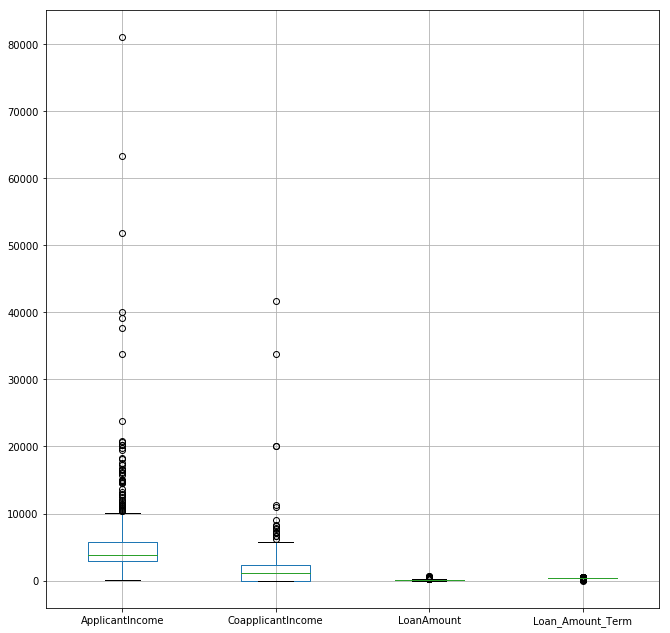

In [38]:
num_imp.boxplot(figsize = [11,11])

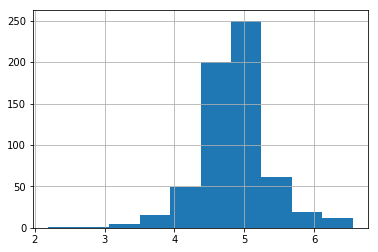

In [40]:
data2['LoanAmt_log'] = np.log(data2['LoanAmount'])
data2['LoanAmt_log'].hist()

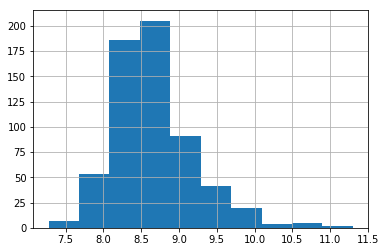

In [41]:
data2['Total_Income'] = data2['ApplicantIncome'] + data2['CoapplicantIncome']
data2['Total_Income_log'] = np.log(data2['Total_Income'])
data2['Total_Income_log'].hist()

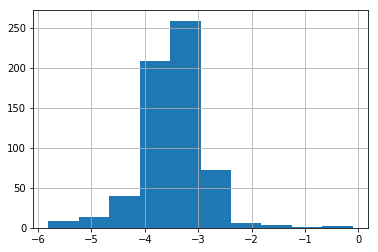

In [44]:
data2['Loan_ratio'] = data2['LoanAmount'] / data['ApplicantIncome']
data2['Loan_ratio_log'] = np.log(data2['Loan_ratio'])
data2['Loan_ratio_log'].hist()

In [50]:
data2.dtypes
data3 = data2.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income', 'Loan_ratio'])
data3.dtypes

Loan_Amount_Term    float64
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
Credit_History      float64
Property_Area        object
Loan_Status          object
LoanAmt_log         float64
Total_Income_log    float64
Loan_ratio_log      float64
dtype: object

LABEL ENCODING

In [51]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data3[i] = le.fit_transform(data3[i])
data3.dtypes 

Loan_Amount_Term    float64
Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
LoanAmt_log         float64
Total_Income_log    float64
Loan_ratio_log      float64
dtype: object

In [53]:
data3.describe()

,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmt_log,Total_Income_log,Loan_ratio_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,342.000000,0.817590,0.653094,0.744300,0.218241,0.133550,0.855049,1.037459,0.687296,4.862066,8.669414,-3.479147
std,64.372489,0.386497,0.476373,1.009623,0.413389,0.340446,0.352339,0.787482,0.463973,0.496575,0.545102,0.590131
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,7.273786,-5.803779
25%,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.607658,8.334712,-3.749004
50%,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.859812,8.597205,-3.473280
75%,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,5.104426,8.925549,-3.152186
max,480.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.551080,11.302204,-0.105361


IMPORTING MODELS FOR PREDICTION OF LOAN STATUS

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [58]:
#Baseline
data3['Loan_Status'].sum()/data3['Loan_Status'].count()

0.6872964169381107

In [140]:
data3.dtypes

Loan_Amount_Term    float64
Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
LoanAmt_log         float64
Total_Income_log    float64
Loan_ratio_log      float64
dtype: object

In [189]:
def model_comb(dat,modl):

    y = dat['Loan_Status']
    x = dat
    x = x.drop('Loan_Status', axis = 1)
    #Model fit
    modl.fit(x,y)
    
    #Model Predictions
    predictions = modl.predict(x)
    
    #Accuracy
    acc = 0
    acc = metrics.accuracy_score(predictions,y)
    print("Accuracy score: ", acc)
    
    #Kfold cross validation
    cf = KFold(dat.shape[0], n_folds= 5)
    acc_all = []
    for train, test in cf:
        x_tr = x.iloc[train,:]
        y_tr = y.iloc[train]
        
        modl.fit(x_tr, y_tr)
        pred = modl.predict(x_tr)
        
        x_ts = x.iloc[test, :]
        y_ts = y.iloc[test]
        
        acc_all.append(modl.score(x_ts,y_ts))
    
    print("Cross fold score : ", np.mean(acc_all))
    
    modl.fit(x,y)
    

In [190]:
#Logistic Regression
modl = LogisticRegression()
model_comb(data3,modl)

Accuracy score:  0.8094462540716613
Cross fold score :  0.809462881514061


In [191]:
#Decision Tree Classifier
modl = DecisionTreeClassifier()
model_comb(data3,modl)


Accuracy score:  1.0
Cross fold score :  0.7149940023990403


In [192]:
#Random Forest
modl = RandomForestClassifier()
model_comb(data3,modl)


Accuracy score:  0.995114006514658
Cross fold score :  0.7637744902039184


In [195]:
#Feature Importance from Random Forest
featimp = pd.Series(modl.feature_importances_, index=x.columns).sort_values(ascending=False)
print(featimp)


Credit_History      0.270554
Total_Income_log    0.189157
Loan_ratio_log      0.183201
LoanAmt_log         0.154014
Dependents          0.048350
Loan_Amount_Term    0.038464
Property_Area       0.036108
Gender              0.027124
Education           0.021497
Married             0.018210
Self_Employed       0.013321
dtype: float64


In [215]:
#Taking only the important 5 columns
var = ['Credit_History', 'Total_Income_log', 'Loan_ratio_log', 'LoanAmt_log', 'Dependents', 'Loan_Status']
data4 = data3[var]
data4.head()
#'TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area'

,Credit_History,Total_Income_log,Loan_ratio_log,LoanAmt_log,Dependents,Loan_Status
0,1.0,8.674026,-3.687600,4.986426,0,1
1,1.0,8.714568,-3.578079,4.852030,1,0
2,1.0,8.006368,-3.816713,4.189655,0,1
3,1.0,8.505323,-3.069215,4.787492,0,1
4,1.0,8.699515,-3.750755,4.948760,0,1


In [216]:
#Logistic Regression
modl = LogisticRegression()
model_comb(data4,modl)

Accuracy score:  0.8094462540716613
Cross fold score :  0.809462881514061


In [217]:
#Decision Tree Classifier
modl = DecisionTreeClassifier()
model_comb(data4,modl)

Accuracy score:  1.0
Cross fold score :  0.6938824470211916


In [218]:
#Random Forest
modl = RandomForestClassifier()
model_comb(data4,modl)

Accuracy score:  0.988599348534202
Cross fold score :  0.7752365720378516


In [221]:
#KNN
modl = KNeighborsClassifier(n_neighbors= 5)
model_comb(data3,modl)


Accuracy score:  0.8110749185667753
Cross fold score :  0.7312408369985339


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B941D76160>,
      dtype=object)

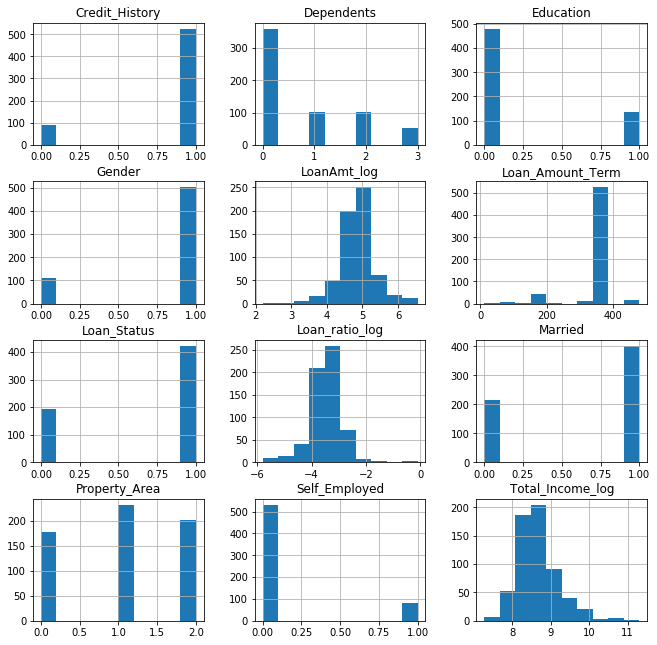

In [224]:
data3.hist(figsize= [11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B942F62828>,
      dtype=object)

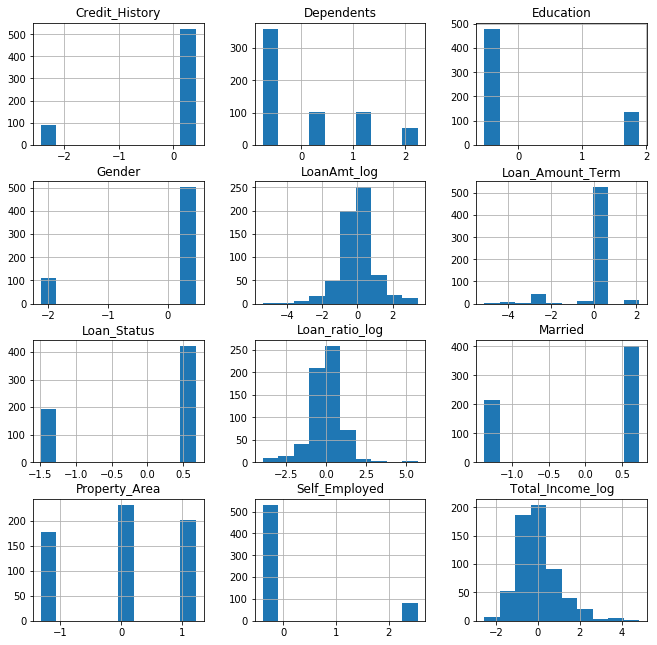

In [228]:
#Standardising variables for Logistic
from sklearn.preprocessing import MinMaxScaler, scale
data5 = pd.DataFrame(scale(data3))
data5.columns = data3.columns
data5.hist(figsize=[11,11])